In [596]:
!pip install --upgrade matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [598]:
lead = pd.read_csv(r'Leads.csv')

In [599]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [600]:
lead.shape

(9240, 37)

In [601]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [602]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### EDA - Exploratory Data Analysis

In [603]:
lead.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


##### Need to check if we have any duplicate values for leadnumber and prospect ID

In [604]:
sum(lead.duplicated(subset = 'Prospect ID')) ==0
sum(lead.duplicated(subset = 'Lead Number')) ==0
# as we see below no duplicate values found

True

##### Prospect ID & Lead Number are two variables that are just indicative of the ID number of the approched People so can be dropped like serial num

In [605]:
lead.drop(['Prospect ID','Lead Number'], axis= 1, inplace=True)

In [606]:
## checking null values in each row
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [607]:
# checking null percentage
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [608]:
### dropping columns with missing % more than 45
cols = lead.columns
for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >=45 ):
        lead.drop(i, axis=1, inplace = True)

In [609]:
lead.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened


In [610]:
lead.shape

(9240, 30)

In [611]:
null_percentage = round(100*(lead.isnull().sum()/len(lead.index)),2)
null_columns= null_percentage[null_percentage > 0]
print(null_columns)

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
City                                             15.37
dtype: float64


In [612]:
#### now checking missing value based on next highest percentage which is 36 for tags will see in detail
lead['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [613]:
### replacing NaN values with not specified
lead['Tags']=lead['Tags'].replace(np.nan, 'Not Specified')

In [614]:
lead['What matters most to you in choosing a course'].value_counts(dropna= False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [615]:
### as we see most of them are in Better Career Prospects so its became single variable for research, so dropping it.
lead = lead.drop('What matters most to you in choosing a course', axis=1)

In [616]:
lead['Lead Profile'].value_counts(dropna= False)

Lead Profile
Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [617]:
lead=lead.drop('Lead Profile', axis=1)

In [618]:
null_percentage = round(100*(lead.isnull().sum()/len(lead.index)),2)
null_columns= null_percentage[null_percentage > 0]
print(null_columns)

Lead Source                            0.39
TotalVisits                            1.48
Page Views Per Visit                   1.48
Last Activity                          1.11
Country                               26.63
Specialization                        15.56
How did you hear about X Education    23.89
What is your current occupation       29.11
City                                  15.37
dtype: float64


In [619]:
lead.shape

(9240, 28)

In [620]:
lead['What is your current occupation'].value_counts(dropna= False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [621]:
# As we see more than 50% in unemployed sector so dropping it. 
lead=lead.drop('What is your current occupation', axis =1)

In [622]:
lead['Country'].value_counts(dropna= False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Russia                     1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Malaysia                   1
Liberi

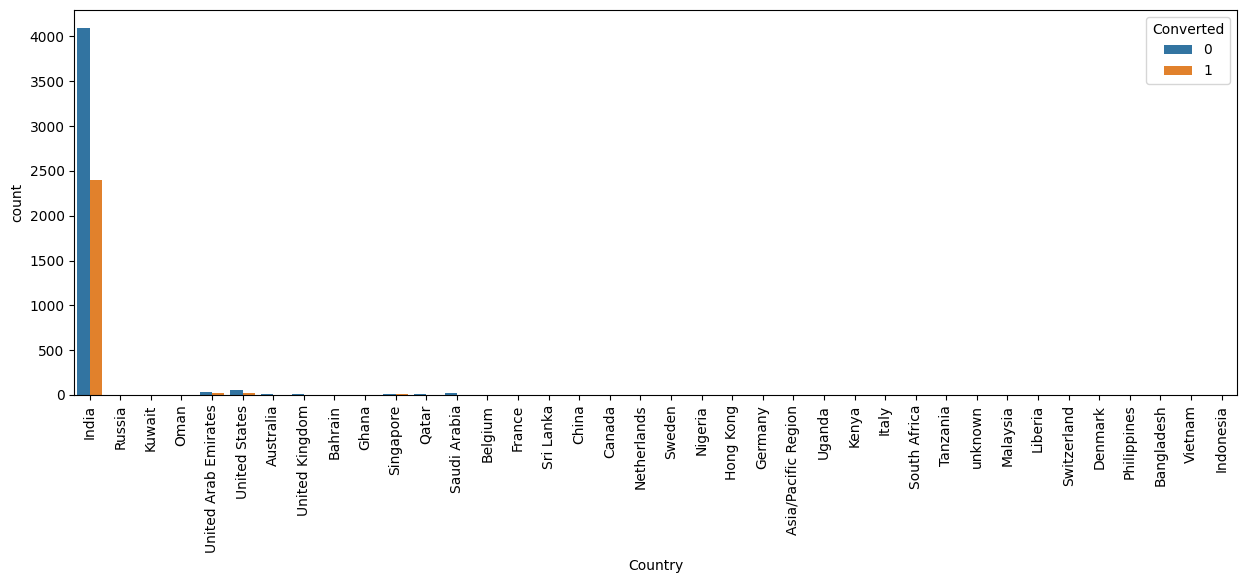

In [623]:
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Country', hue='Converted', data=lead)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [624]:
### as we see majority lies at Country India so dropping it.
lead = lead.drop(['Country'], axis=1)

In [625]:
lead['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [626]:
lead['City']=lead['City'].replace(np.nan, 'Mumbai')

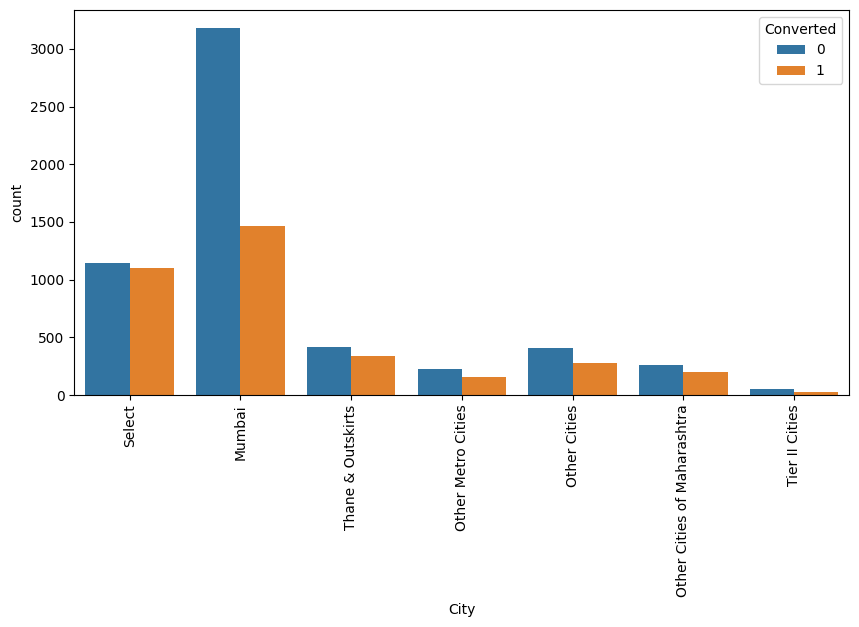

In [627]:
plt.figure(figsize=(10,5))
s1=sns.countplot(x ='City', hue='Converted', data=lead)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [628]:
null_percentage = round(100*(lead.isnull().sum()/len(lead.index)),2)
null_columns= null_percentage[null_percentage > 0]
print(null_columns)

Lead Source                            0.39
TotalVisits                            1.48
Page Views Per Visit                   1.48
Last Activity                          1.11
Specialization                        15.56
How did you hear about X Education    23.89
dtype: float64


In [629]:
lead.shape

(9240, 26)

In [630]:
lead['How did you hear about X Education'].value_counts(dropna=False)

How did you hear about X Education
Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [631]:
lead=lead.drop('How did you hear about X Education', axis=1)

In [632]:
lead.shape

(9240, 25)

In [633]:
lead['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [634]:
lead['Lead Source']=lead['Lead Source'].replace(np.nan, 'Google')

In [635]:
null_percentage = round(100*(lead.isnull().sum()/len(lead.index)),2)
null_columns= null_percentage[null_percentage > 0]
print(null_columns)

TotalVisits              1.48
Page Views Per Visit     1.48
Last Activity            1.11
Specialization          15.56
dtype: float64


In [636]:
lead['Specialization'].value_counts(dropna=False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [637]:
lead['Specialization']=lead['Specialization'].replace(np.nan, 'Not_Specified')

In [638]:
lead.shape

(9240, 25)

In [639]:
lead_cleaned = lead.dropna()

In [640]:
lead_cleaned.shape

(9103, 25)

In [641]:
null_percentage = round(100*(lead_cleaned.isnull().sum()/len(lead_cleaned.index)),2)
null_columns= null_percentage[null_percentage > 0]
print(null_columns)

Series([], dtype: float64)


In [642]:
lead.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,Interested in other courses,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,Ringing,No,No,Select,No,No,Email Opened


In [643]:
lead['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

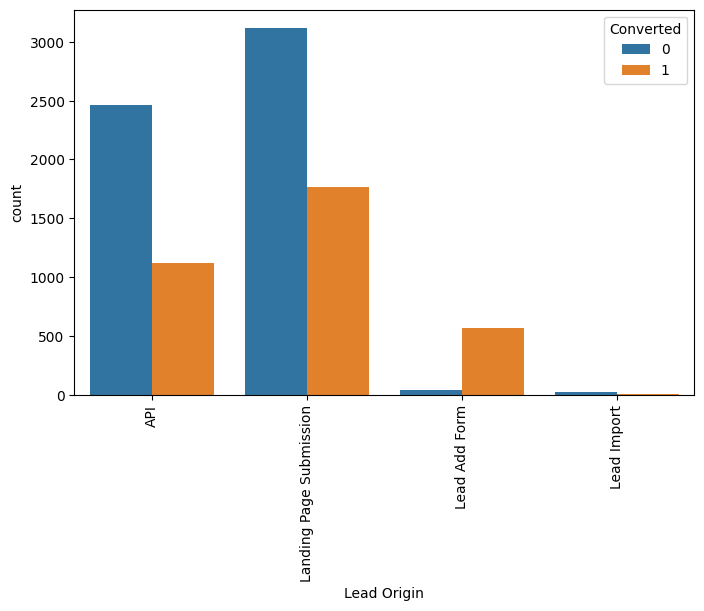

In [644]:
plt.figure(figsize=(8,5))
s1=sns.countplot(x='Lead Origin', hue='Converted', data=lead_cleaned)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

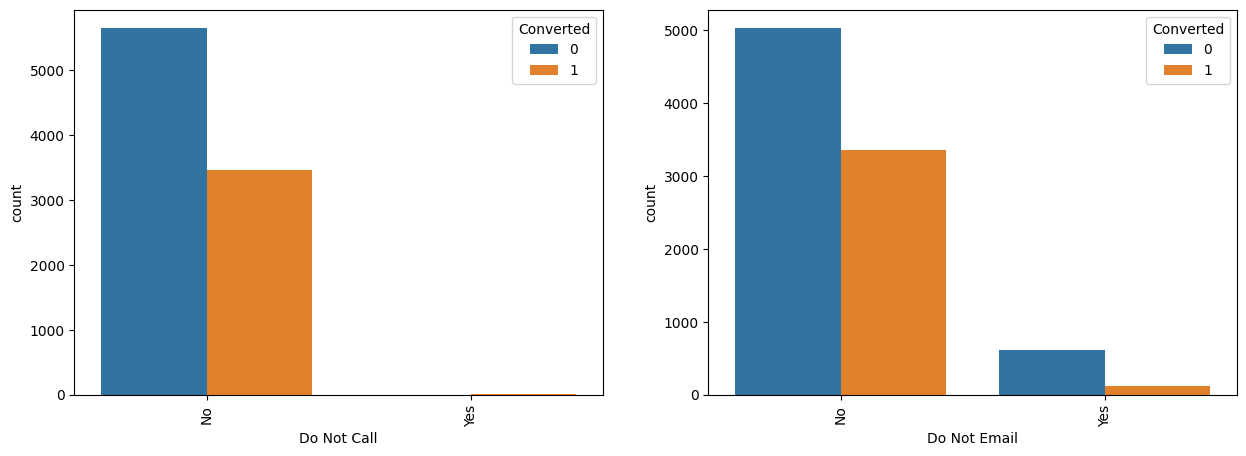

In [645]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
ax1=sns.countplot(x='Do Not Call', hue='Converted', data=lead_cleaned)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1,2,2)
ax2=sns.countplot(x='Do Not Email', hue='Converted', data=lead_cleaned)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

#### Now we will see which columns does have impact on our analysis or what needs to be looked at

In [646]:
lead_cleaned['Do Not Call'].value_counts(dropna=False)

Do Not Call
No     9101
Yes       2
Name: count, dtype: int64

In [647]:
lead_cleaned['Do Not Email'].value_counts(dropna=False)

Do Not Email
No     8379
Yes     724
Name: count, dtype: int64

In [648]:
#### We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value
lead_cleaned=lead_cleaned.drop('Do Not Call', axis=1)

In [649]:
lead_cleaned.shape

(9103, 24)

In [650]:
lead_cleaned['Search'].value_counts(dropna=False)

Search
No     9089
Yes      14
Name: count, dtype: int64

In [651]:
lead_cleaned=lead_cleaned.drop('Search', axis=1)

In [652]:
lead_cleaned['Magazine'].value_counts(dropna=False)

Magazine
No    9103
Name: count, dtype: int64

In [653]:
lead_cleaned['Newspaper Article'].value_counts(dropna=False)

Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64

In [654]:
lead_cleaned['X Education Forums'].value_counts(dropna=False)

X Education Forums
No     9102
Yes       1
Name: count, dtype: int64

In [655]:
lead_cleaned['Newspaper'].value_counts(dropna=False)

Newspaper
No     9102
Yes       1
Name: count, dtype: int64

In [656]:
lead_cleaned['Digital Advertisement'].value_counts(dropna=False)

Digital Advertisement
No     9099
Yes       4
Name: count, dtype: int64

In [657]:
lead_cleaned['Through Recommendations'].value_counts(dropna=False)

Through Recommendations
No     9096
Yes       7
Name: count, dtype: int64

In [658]:
lead_cleaned['Receive More Updates About Our Courses'].value_counts(dropna=False)

Receive More Updates About Our Courses
No    9103
Name: count, dtype: int64

In [659]:
lead_cleaned['Get updates on DM Content'].value_counts(dropna=False)

Get updates on DM Content
No    9103
Name: count, dtype: int64

In [660]:
lead_cleaned['A free copy of Mastering The Interview'].value_counts(dropna=False)

A free copy of Mastering The Interview
No     6215
Yes    2888
Name: count, dtype: int64

In [661]:
lead_cleaned['I agree to pay the amount through cheque'].value_counts(dropna=False)

I agree to pay the amount through cheque
No    9103
Name: count, dtype: int64

In [662]:
lead_cleaned['Update me on Supply Chain Content'].value_counts(dropna=False)

Update me on Supply Chain Content
No    9103
Name: count, dtype: int64

##### The columns with univariate in nature we are dropping as those will not add value to our analysism

In [663]:
lead_cleaned = lead_cleaned.drop(['Get updates on DM Content', 'Update me on Supply Chain Content','I agree to pay the amount through cheque','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper','Newspaper Article','X Education Forums','Magazine'], axis=1)

In [664]:
lead_cleaned.shape

(9103, 13)

In [665]:
lead_cleaned.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Interested in other courses,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Ringing,Select,No,Email Opened


In [666]:
lead_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   object 
 

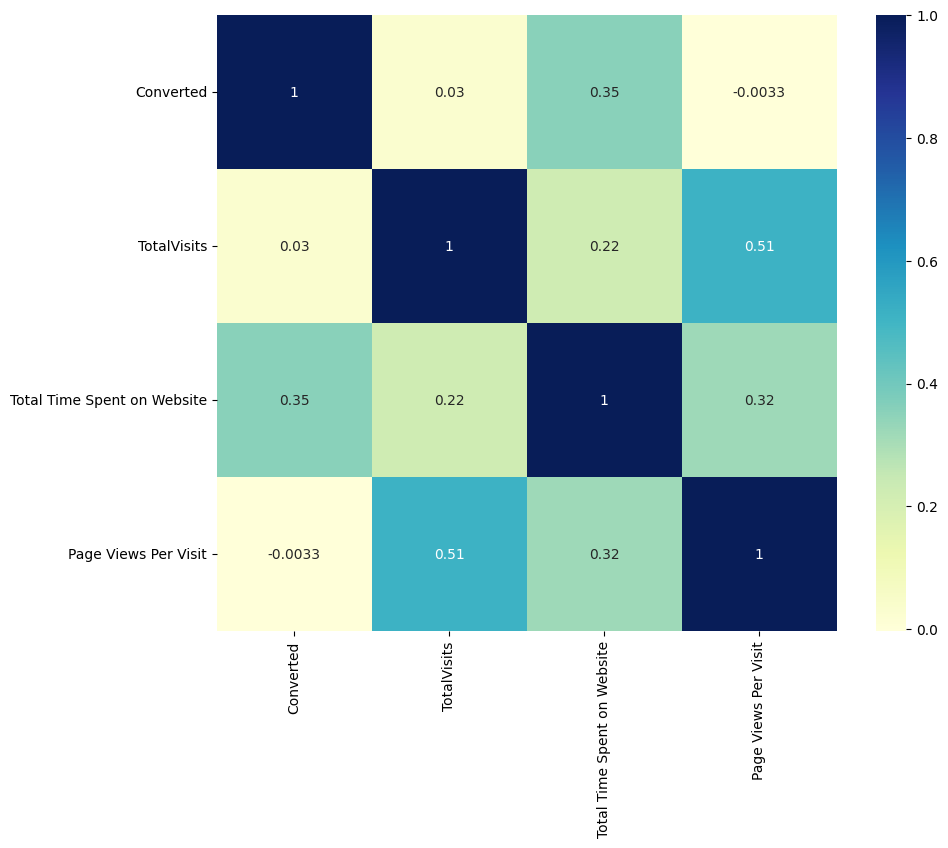

In [667]:
numeric_data = lead_cleaned.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Checking for outliers

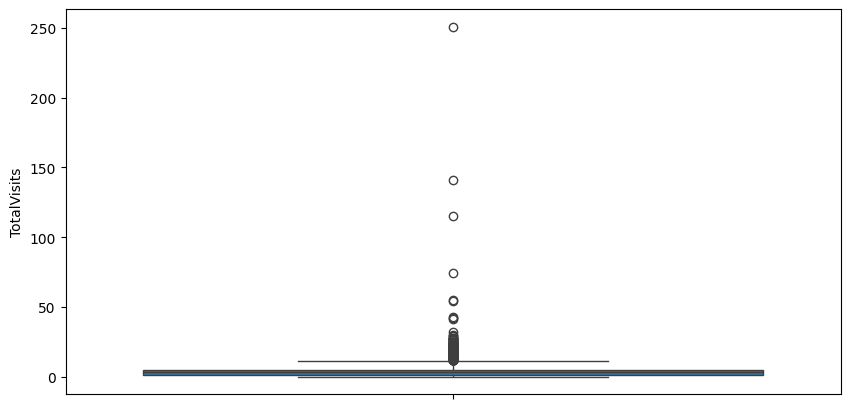

In [668]:
plt.figure(figsize=(10,5))
sns.boxplot(y=lead_cleaned['TotalVisits'])
plt.show()

In [669]:
lead_cleaned['TotalVisits'].describe(percentiles=[0.05, 0.25, 0.40, 0.50, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
40%         2.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

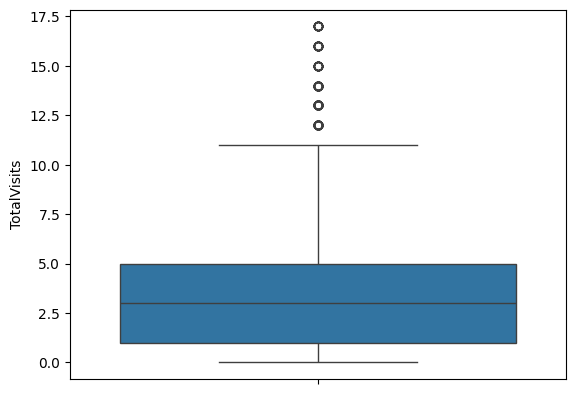

In [670]:
Q3 = lead_cleaned.TotalVisits.quantile(0.99)
lead_cleaned = lead_cleaned[(lead_cleaned.TotalVisits <= Q3)]
Q1 = lead_cleaned.TotalVisits.quantile(0.01)
lead_cleaned = lead_cleaned[(lead_cleaned.TotalVisits >= Q1)]
sns.boxplot(y=lead_cleaned['TotalVisits'])
plt.show()

In [671]:
lead_cleaned.shape

(9020, 13)

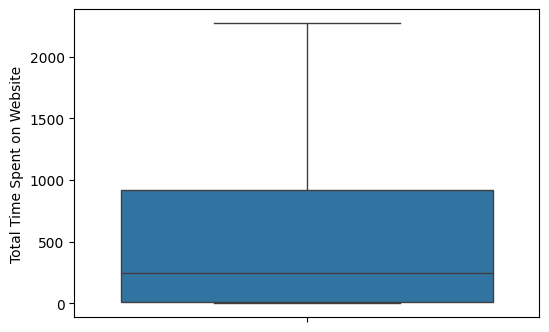

In [672]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_cleaned['Total Time Spent on Website'])
plt.show()

##### no outliers found in above graph

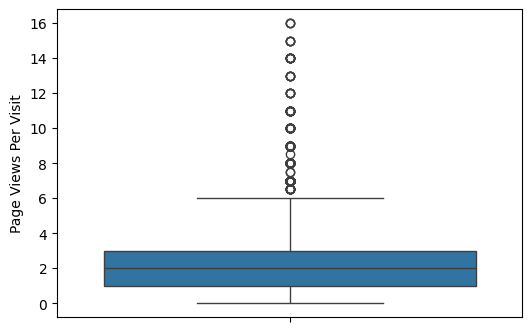

In [673]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_cleaned['Page Views Per Visit'])
plt.show()

In [674]:
lead_cleaned['Page Views Per Visit'].describe(percentiles=[0.05, 0.25, 0.40, 0.50, 0.75, 0.90, 0.95, 0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
40%         2.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

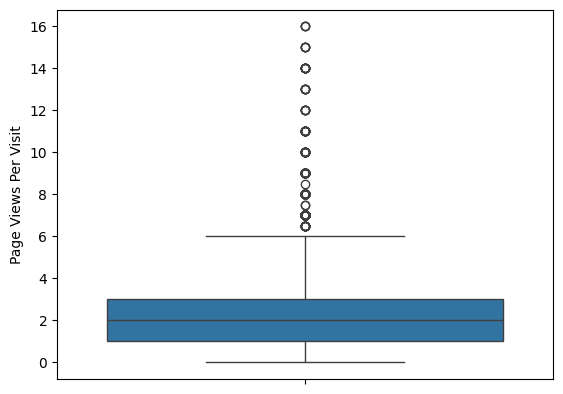

In [675]:
Q3 = lead_cleaned['Page Views Per Visit'].quantile(0.99)
leads = lead_cleaned[lead_cleaned['Page Views Per Visit'] <= Q3]
Q1 = lead_cleaned['Page Views Per Visit'].quantile(0.01)
leads = lead_cleaned[lead_cleaned['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead_cleaned['Page Views Per Visit'])
plt.show()

In [676]:
lead_cleaned.shape

(9020, 13)

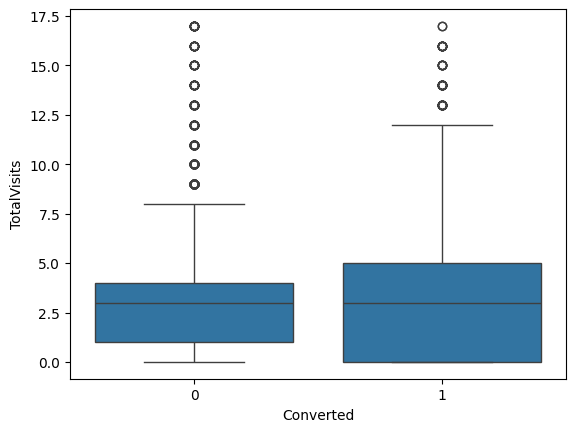

In [677]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_cleaned)
plt.show()

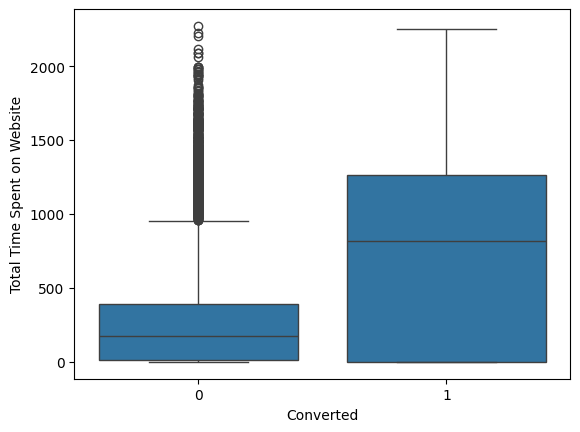

In [678]:
sns.boxplot(x=leads.Converted, y=lead_cleaned['Total Time Spent on Website'])
plt.show()

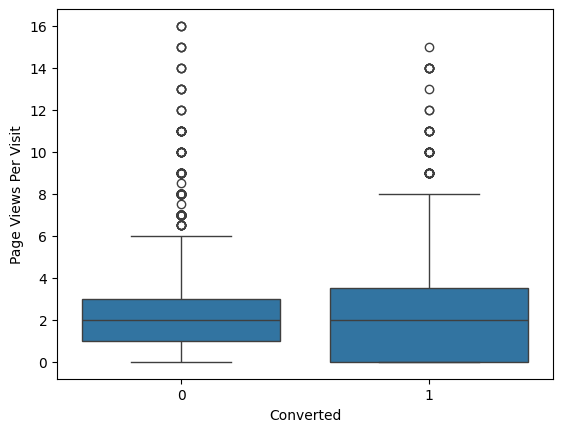

In [679]:
sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

In [680]:
##### checking for missing values left in anycolumn
round(100*(lead_cleaned.isnull().sum()/len(lead_cleaned.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [681]:
lead_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9020 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9020 non-null   object 
 1   Lead Source                             9020 non-null   object 
 2   Do Not Email                            9020 non-null   object 
 3   Converted                               9020 non-null   int64  
 4   TotalVisits                             9020 non-null   float64
 5   Total Time Spent on Website             9020 non-null   int64  
 6   Page Views Per Visit                    9020 non-null   float64
 7   Last Activity                           9020 non-null   object 
 8   Specialization                          9020 non-null   object 
 9   Tags                                    9020 non-null   object 
 10  City                                    9020 non-null   object 
 

##### As we see all Null values have been adjusted/dropped based on the percentage and usage, data has been cleaned

In [682]:
cat_cols=lead_cleaned.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [683]:
lead_cleaned.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Interested in other courses,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Ringing,Select,No,Email Opened


In [684]:
### Converting yes or no to Binomial variable as 0 & 1
varlist=['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes':1, 'No':0})
lead_cleaned[varlist]=lead_cleaned[varlist].apply(binary_map)

In [685]:
lead_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9020 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9020 non-null   object 
 1   Lead Source                             9020 non-null   object 
 2   Do Not Email                            9020 non-null   int64  
 3   Converted                               9020 non-null   int64  
 4   TotalVisits                             9020 non-null   float64
 5   Total Time Spent on Website             9020 non-null   int64  
 6   Page Views Per Visit                    9020 non-null   float64
 7   Last Activity                           9020 non-null   object 
 8   Specialization                          9020 non-null   object 
 9   Tags                                    9020 non-null   object 
 10  City                                    9020 non-null   object 
 

In [686]:
lead_cleaned.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Interested in other courses,Select,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Ringing,Select,0,Email Opened


In [687]:
lead_cleaned['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4820
API                        3562
Lead Add Form               607
Lead Import                  31
Name: count, dtype: int64

In [688]:
lead_cleaned['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2879
Direct Traffic       2512
Olark Chat           1751
Organic Search       1125
Reference             442
Welingak Website      129
Referral Sites        123
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

Performing bivariate analysis

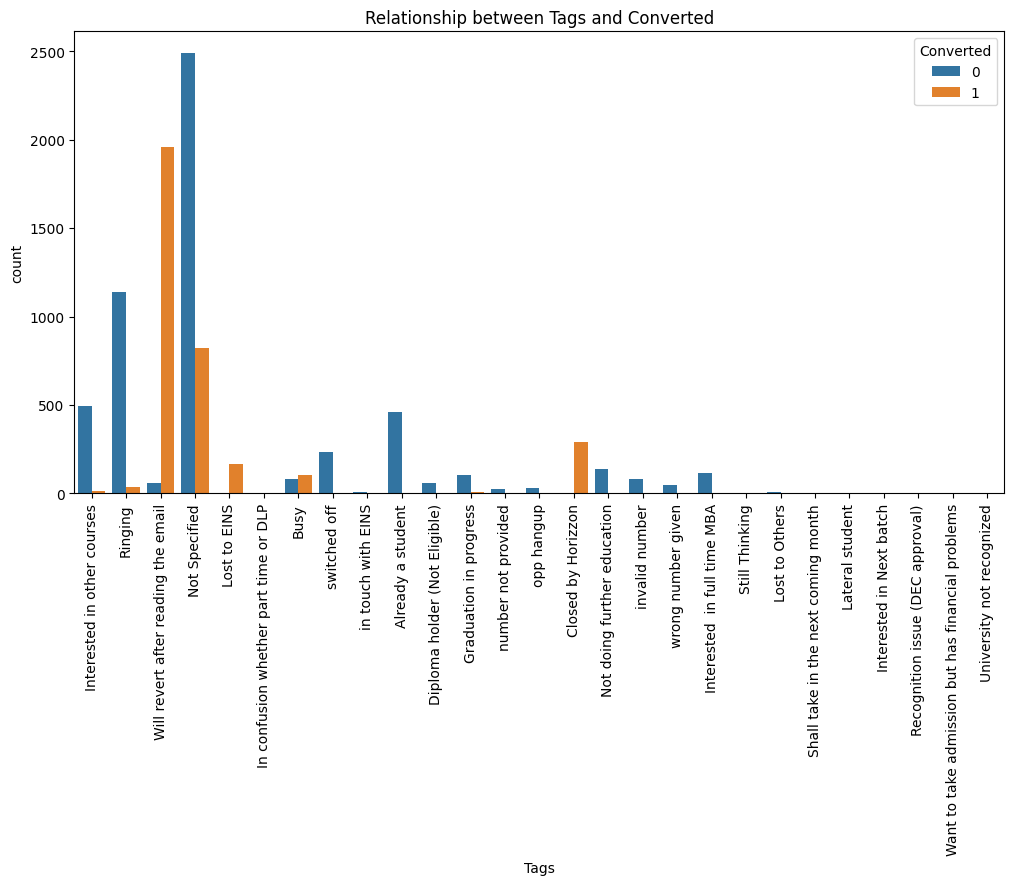

In [689]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Tags', hue='Converted', data=lead_cleaned)
plt.xticks(rotation=90)
plt.title('Relationship between Tags and Converted')
plt.show()

Clearly people who have said "Will revert after reading the email" have a very high chance of conversion


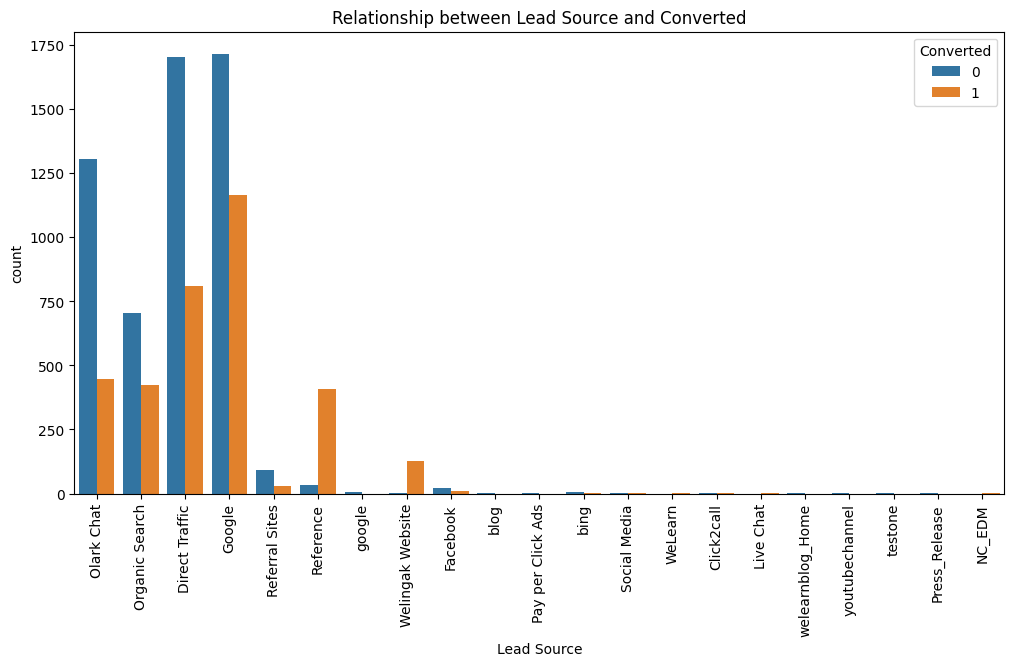

In [690]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Lead Source', hue='Converted', data=lead_cleaned)
plt.xticks(rotation=90)
plt.title('Relationship between Lead Source and Converted')
plt.show()

Clearly the leads coming through reference have a high probability of conversion


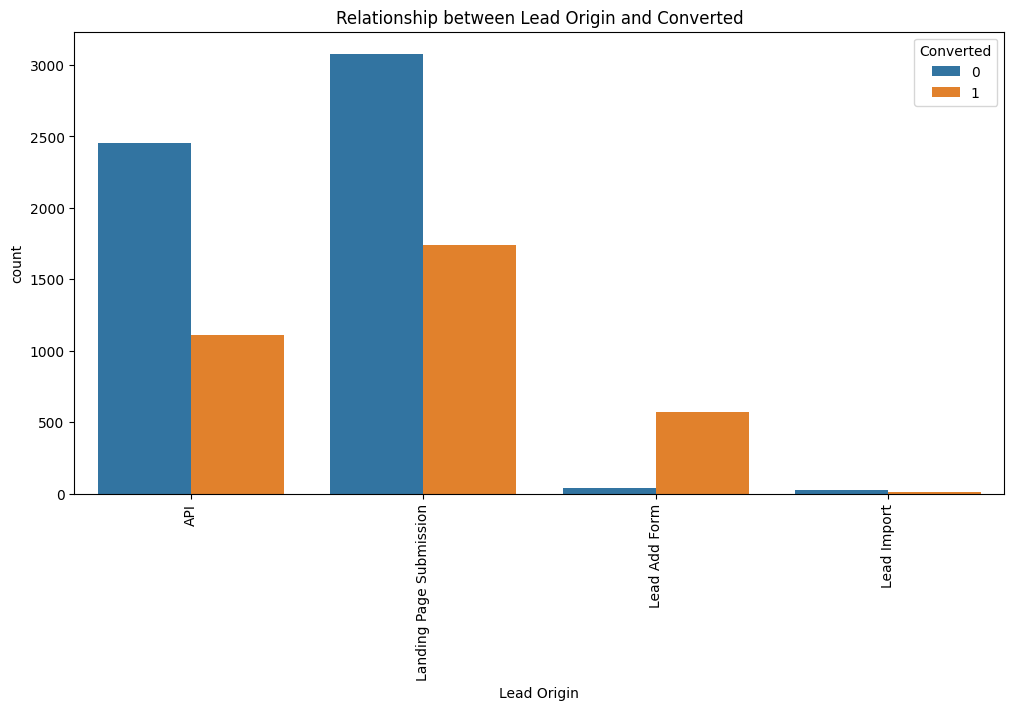

In [692]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Lead Origin', hue='Converted', data=lead_cleaned)
plt.xticks(rotation=90)
plt.title('Relationship between Lead Origin and Converted')
plt.show()

This means that the leads coming via Form filling have a ligher conversion rate.

#### Dummy Creation
##### As we have multiple heading with single variables will collate and add it to others for creation of Dummies

In [ ]:
### as we have multiple heading with single variables will collate and it to others
value_counts = lead_cleaned['Lead Source'].value_counts()
lead_cleaned['Lead Source']= lead_cleaned['Lead Source'].apply(lambda x:x if value_counts[x] >=150 else 'Others')

In [ ]:
lead_cleaned['Lead Source'].value_counts(dropna=False)

Lead Source
Google            2879
Direct Traffic    2512
Olark Chat        1751
Organic Search    1125
Reference          442
Others             311
Name: count, dtype: int64

In [ ]:
dummy = pd.get_dummies(lead_cleaned[['Lead Source', 'Lead Origin']],drop_first=True)
lead_cleaned=pd.concat([lead_cleaned,dummy],axis=1)

In [ ]:
lead_cleaned['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3415
SMS Sent                        2722
Olark Chat Conversation          970
Page Visited on Website          602
Converted to Lead                428
Email Bounced                    311
Email Link Clicked               266
Form Submitted on Website        115
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          24
View in browser link Clicked       5
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [ ]:
value_counts = lead_cleaned['Last Activity'].value_counts()
lead_cleaned['Last Activity']= lead_cleaned['Last Activity'].apply(lambda x:x if value_counts[x] >=150 else 'Others')

In [ ]:
lead_cleaned['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened               3415
SMS Sent                   2722
Olark Chat Conversation     970
Page Visited on Website     602
Converted to Lead           428
Email Bounced               311
Others                      306
Email Link Clicked          266
Name: count, dtype: int64

In [ ]:
lead_cleaned['Specialization'].value_counts(dropna=False)

Specialization
Select                               1867
Not_Specified                        1426
Finance Management                    954
Human Resource Management             826
Marketing Management                  819
Operations Management                 498
Business Administration               393
IT Projects Management                363
Supply Chain Management               343
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
Healthcare Management                 152
E-COMMERCE                            110
Hospitality Management                109
Retail Management                      97
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: count, dtype: int64

In [ ]:
value_counts = lead_cleaned['Specialization'].value_counts()
lead_cleaned['Specialization']= lead_cleaned['Specialization'].apply(lambda x:x if value_counts[x] >=200 else 'Others')

In [ ]:
dummy = pd.get_dummies(lead_cleaned[['Last Activity', 'Specialization']],drop_first=True)
lead_cleaned=pd.concat([lead_cleaned,dummy],axis=1)

In [ ]:
lead_cleaned['Tags'].value_counts(dropna=False)

Tags
Not Specified                                        3308
Will revert after reading the email                  2017
Ringing                                              1173
Interested in other courses                           506
Already a student                                     464
Closed by Horizzon                                    292
switched off                                          239
Busy                                                  185
Lost to EINS                                          171
Not doing further education                           138
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch 

In [ ]:
value_counts = lead_cleaned['Tags'].value_counts()
lead_cleaned['Tags']= lead_cleaned['Tags'].apply(lambda x:x if value_counts[x] >=200 else 'Others')

In [ ]:
lead_cleaned['City'].value_counts(dropna=False)

City
Mumbai                         4549
Select                         2177
Thane & Outskirts               732
Other Cities                    671
Other Cities of Maharashtra     446
Other Metro Cities              372
Tier II Cities                   73
Name: count, dtype: int64

In [ ]:
lead_cleaned['Last Notable Activity'].value_counts(dropna=False)

Last Notable Activity
Modified                        3253
Email Opened                    2807
SMS Sent                        2159
Page Visited on Website          289
Olark Chat Conversation          182
Email Link Clicked               172
Email Bounced                     59
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [ ]:
value_counts = lead_cleaned['Last Notable Activity'].value_counts()
lead_cleaned['Last Notable Activity']= lead_cleaned['Last Notable Activity'].apply(lambda x:x if value_counts[x] >=150 else 'Others')

In [ ]:
dummy = pd.get_dummies(lead_cleaned[['Last Notable Activity', 'Tags','City']],drop_first=True)
lead_cleaned=pd.concat([lead_cleaned,dummy],axis=1)

In [ ]:
lead_cleaned.drop(cat_cols,axis=1,inplace=True)

In [ ]:
lead_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9020 entries, 0 to 9239
Data columns (total 48 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Converted                                      9020 non-null   int64  
 1   TotalVisits                                    9020 non-null   float64
 2   Total Time Spent on Website                    9020 non-null   int64  
 3   Page Views Per Visit                           9020 non-null   float64
 4   Lead Source_Google                             9020 non-null   bool   
 5   Lead Source_Olark Chat                         9020 non-null   bool   
 6   Lead Source_Organic Search                     9020 non-null   bool   
 7   Lead Source_Others                             9020 non-null   bool   
 8   Lead Source_Reference                          9020 non-null   bool   
 9   Lead Origin_Landing Page Submission            9020 non-n

In [ ]:
lead_cleaned.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Origin_Landing Page Submission,...,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,5.0,674,2.5,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False


#### Using Sklearn model selection for train test split

In [ ]:
from sklearn.model_selection import train_test_split
y=lead_cleaned['Converted']
y.head()
X=lead_cleaned.drop('Converted', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7216 entries, 181 to 5783
Data columns (total 47 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   TotalVisits                                    7216 non-null   float64
 1   Total Time Spent on Website                    7216 non-null   int64  
 2   Page Views Per Visit                           7216 non-null   float64
 3   Lead Source_Google                             7216 non-null   bool   
 4   Lead Source_Olark Chat                         7216 non-null   bool   
 5   Lead Source_Organic Search                     7216 non-null   bool   
 6   Lead Source_Others                             7216 non-null   bool   
 7   Lead Source_Reference                          7216 non-null   bool   
 8   Lead Origin_Landing Page Submission            7216 non-null   bool   
 9   Lead Origin_Lead Add Form                      7216 non

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols = X_train.select_dtypes(include = ['float64', 'int64']).columns
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
181,-1.070983,-0.876892,-1.135114,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3683,0.269790,0.578541,0.810806,False,False,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
8541,2.616143,2.577238,0.202706,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2016,0.269790,1.042885,0.810806,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
1784,-1.070983,-0.876892,-1.135114,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
import statsmodels.api as sm

#### Using RFE model to limit the number of variables to 15

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False])

In [ ]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('TotalVisits', np.False_, np.int64(15)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Page Views Per Visit', np.False_, np.int64(17)),
 ('Lead Source_Google', np.False_, np.int64(21)),
 ('Lead Source_Olark Chat', np.True_, np.int64(1)),
 ('Lead Source_Organic Search', np.False_, np.int64(29)),
 ('Lead Source_Others', np.False_, np.int64(7)),
 ('Lead Source_Reference', np.True_, np.int64(1)),
 ('Lead Origin_Landing Page Submission', np.False_, np.int64(5)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Lead Import', np.False_, np.int64(16)),
 ('Last Activity_Email Bounced', np.True_, np.int64(1)),
 ('Last Activity_Email Link Clicked', np.False_, np.int64(33)),
 ('Last Activity_Email Opened', np.False_, np.int64(3)),
 ('Last Activity_Olark Chat Conversation', np.True_, np.int64(1)),
 ('Last Activity_Others', np.False_, np.int64(6)),
 ('Last Activity_Page Visited on Website', np.False_, np.int64(19)),
 ('Last Activity_SMS Sent', np.False_, np.int64

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Not Specified', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'City_Select'],
      dtype='object')

### Building Model

In [ ]:
print(X_train[col].dtypes)
print(y_train.dtypes)

Total Time Spent on Website                 float64
Lead Source_Olark Chat                         bool
Lead Source_Reference                          bool
Lead Origin_Lead Add Form                      bool
Last Activity_Email Bounced                    bool
Last Activity_Olark Chat Conversation          bool
Last Notable Activity_SMS Sent                 bool
Tags_Closed by Horizzon                        bool
Tags_Interested in other courses               bool
Tags_Not Specified                             bool
Tags_Others                                    bool
Tags_Ringing                                   bool
Tags_Will revert after reading the email       bool
Tags_switched off                              bool
City_Select                                    bool
dtype: object
int64


In [ ]:
X_train[col] = X_train[col].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

In [ ]:
X_train[col] = X_train[col].astype(int)

In [ ]:
print(X_train[col].dtypes)
print(y_train.dtypes)

Total Time Spent on Website                 int64
Lead Source_Olark Chat                      int64
Lead Source_Reference                       int64
Lead Origin_Lead Add Form                   int64
Last Activity_Email Bounced                 int64
Last Activity_Olark Chat Conversation       int64
Last Notable Activity_SMS Sent              int64
Tags_Closed by Horizzon                     int64
Tags_Interested in other courses            int64
Tags_Not Specified                          int64
Tags_Others                                 int64
Tags_Ringing                                int64
Tags_Will revert after reading the email    int64
Tags_switched off                           int64
City_Select                                 int64
dtype: object
int64


In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7216
Model:                            GLM   Df Residuals:                     7200
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1685.7
Date:                Sun, 15 Dec 2024   Deviance:                       3371.5
Time:                        17:48:58   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5753
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.8309      0.599     -9.727      0.000      -7.006      -4.656
Total Time Spent on Website                  1.4777      0.085     17.380      0.000       1.311       1.644
Lead Source_Olark Chat                       0.3731      0.122      3.058      0.002       0.134       0.612
Lead Source_Reference                       -2.4575      0.622     -3.951      0.000      -3.676      -1.238
Lead Origin_Lead Add Form                    3.3721      0.511      6.605      0.000       2.371       4.373
Last Activity_Email Bounced                 -1.9652      0.386     -5.094      0.000      -2.721      -1.209
Last Activity_Olark Chat Conversation       -1.4906      0.190     -7.858      0.000      -1.862      -1.119
Last Notable Activity_SMS Sent               2.1423      0.112     19.096      0.000       1.922       2.362
Tags_Closed by Horizzon                     10.4578      1.174      8.911      0.000       8.158      12.758
Tags_Interested in other courses             0.7051      0.692      1.018      0.309      -0.652       2.062
Tags_Not Specified                           3.6526      0.597      6.117      0.000       2.482       4.823
Tags_Others                                  3.7562      0.600      6.258      0.000       2.580       4.933
Tags_Ringing                                -0.0641      0.633     -0.101      0.919      -1.305       1.176
Tags_Will revert after reading the email     8.1037      0.617     13.136      0.000       6.895       9.313
Tags_switched off                           -0.7123      0.858     -0.830      0.407      -2.394       0.970
City_Select                                  1.3511      0.116     11.653      0.000       1.124       1.578
============================================================================================================
"""

In [ ]:
### check for VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.14
2,Lead Source_Reference,3.87
1,Lead Source_Olark Chat,1.75
12,Tags_Will revert after reading the email,1.73
6,Last Notable Activity_SMS Sent,1.60
14,City_Select,1.59
9,Tags_Not Specified,1.57
5,Last Activity_Olark Chat Conversation,1.44
0,Total Time Spent on Website,1.42
7,Tags_Closed by Horizzon,1.19


#### Building Model 2

In [ ]:
col=col.drop('Tags_Ringing', 1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7216
Model:                            GLM   Df Residuals:                     7201
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1685.7
Date:                Sun, 15 Dec 2024   Deviance:                       3371.5
Time:                        17:48:59   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5753
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.8871      0.230    -25.600      0.000      -6.338      -5.436
Total Time Spent on Website                  1.4777      0.085     17.379      0.000       1.311       1.644
Lead Source_Olark Chat                       0.3734      0.122      3.060      0.002       0.134       0.613
Lead Source_Reference                       -2.4583      0.622     -3.954      0.000      -3.677      -1.240
Lead Origin_Lead Add Form                    3.3716      0.510      6.606      0.000       2.371       4.372
Last Activity_Email Bounced                 -1.9653      0.386     -5.095      0.000      -2.721      -1.209
Last Activity_Olark Chat Conversation       -1.4907      0.190     -7.858      0.000      -1.863      -1.119
Last Notable Activity_SMS Sent               2.1409      0.111     19.234      0.000       1.923       2.359
Tags_Closed by Horizzon                     10.5144      1.033     10.177      0.000       8.489      12.539
Tags_Interested in other courses             0.7615      0.415      1.835      0.067      -0.052       1.575
Tags_Not Specified                           3.7091      0.218     17.051      0.000       3.283       4.135
Tags_Others                                  3.8127      0.226     16.865      0.000       3.370       4.256
Tags_Will revert after reading the email     8.1601      0.268     30.397      0.000       7.634       8.686
Tags_switched off                           -0.6551      0.647     -1.012      0.311      -1.923       0.613
City_Select                                  1.3512      0.116     11.655      0.000       1.124       1.578
============================================================================================================
"""

In [ ]:
col=col.drop('Tags_switched off', 1)

#### Building model 3

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7216
Model:                            GLM   Df Residuals:                     7202
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1686.3
Date:                Sun, 15 Dec 2024   Deviance:                       3372.7
Time:                        17:48:59   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5753
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.9645      0.222    -26.850      0.000      -6.400      -5.529
Total Time Spent on Website                  1.4774      0.085     17.382      0.000       1.311       1.644
Lead Source_Olark Chat                       0.3760      0.122      3.083      0.002       0.137       0.615
Lead Source_Reference                       -2.4464      0.624     -3.921      0.000      -3.669      -1.224
Lead Origin_Lead Add Form                    3.3753      0.511      6.600      0.000       2.373       4.378
Last Activity_Email Bounced                 -1.9653      0.386     -5.095      0.000      -2.721      -1.209
Last Activity_Olark Chat Conversation       -1.4916      0.190     -7.863      0.000      -1.863      -1.120
Last Notable Activity_SMS Sent               2.1388      0.111     19.214      0.000       1.921       2.357
Tags_Closed by Horizzon                     10.5882      1.032     10.263      0.000       8.566      12.610
Tags_Interested in other courses             0.8386      0.411      2.041      0.041       0.033       1.644
Tags_Not Specified                           3.7863      0.209     18.091      0.000       3.376       4.197
Tags_Others                                  3.8899      0.218     17.831      0.000       3.462       4.317
Tags_Will revert after reading the email     8.2366      0.262     31.439      0.000       7.723       8.750
City_Select                                  1.3513      0.116     11.662      0.000       1.124       1.578
============================================================================================================
"""

#### VIF Values of the feature variables

In [ ]:
### check for VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.13
2,Lead Source_Reference,3.87
1,Lead Source_Olark Chat,1.75
11,Tags_Will revert after reading the email,1.64
12,City_Select,1.54
9,Tags_Not Specified,1.53
6,Last Notable Activity_SMS Sent,1.47
5,Last Activity_Olark Chat Conversation,1.44
0,Total Time Spent on Website,1.39
7,Tags_Closed by Horizzon,1.18


##### We have now removed all variables with P Value less more than 0.05 and VIF more than 5. No other variables have to be dropped.


In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

181     0.032342
3683    0.002562
8541    0.999046
2016    0.977010
1784    0.014243
5480    0.906537
1193    0.977010
6459    0.111588
4660    0.903867
2779    0.024849
dtype: float64

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Converted_prob' : y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
181,0,0.032342,181
3683,0,0.002562,3683
8541,1,0.999046,8541
2016,1,0.977010,2016
1784,0,0.014243,1784


In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
181,0,0.032342,181,0
3683,0,0.002562,3683,0
8541,1,0.999046,8541,1
2016,1,0.977010,2016,1
1784,0,0.014243,1784,0


In [ ]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[4312  194]
 [ 510 2200]]


In [ ]:
##### Lets check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9024390243902439


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.8118081180811808)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.9569462938304483)

In [ ]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04305370616955171


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.9189640768588136


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8942347573620905


Generating Scorecard (Values from 0-100)

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:] * 100

181      3.234193
3683     0.256170
8541    99.904628
2016    97.700995
1784     1.424320
          ...    
368      3.578612
82      98.200417
8250    10.172321
7116    93.389437
5783    98.800155
Length: 7216, dtype: float64

### PLOTTING ROC curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

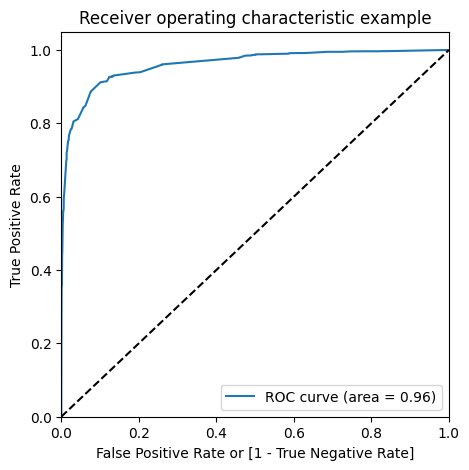

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Finding Optimal cutoff point
#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity
##### Let's create columns with different probability cutoffs 

In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
181,0,0.032342,181,0,1,0,0,0,0,0,0,0,0,0
3683,0,0.002562,3683,0,1,0,0,0,0,0,0,0,0,0
8541,1,0.999046,8541,1,1,1,1,1,1,1,1,1,1,1
2016,1,0.977010,2016,1,1,1,1,1,1,1,1,1,1,1
1784,0,0.014243,1784,0,1,0,0,0,0,0,0,0,0,0


#### now let's calculate accuracy , sensitivity and specificity for various prob ability cutoffs

In [ ]:
cutoff_df = pd.DataFrame(columns =[ 'prob', 'accuracy', 'sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375554  1.000000  0.000000
0.1   0.1  0.705100  0.980074  0.539725
0.2   0.2  0.892045  0.927675  0.870617
0.3   0.3  0.895371  0.926568  0.876609
0.4   0.4  0.903963  0.847970  0.937639
0.5   0.5  0.902439  0.811808  0.956946
0.6   0.6  0.904102  0.792251  0.971372
0.7   0.7  0.901746  0.775646  0.977585
0.8   0.8  0.895649  0.753875  0.980914
0.9   0.9  0.877910  0.696310  0.987128


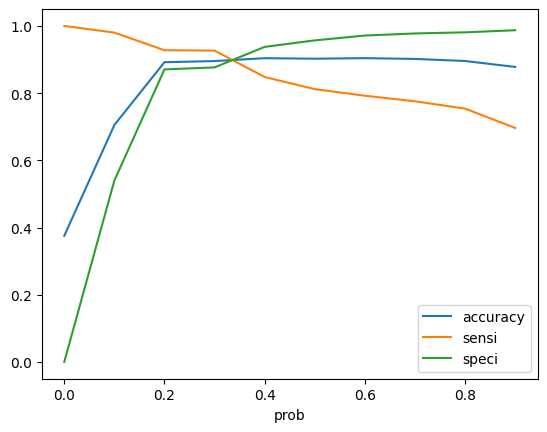

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
181,0,0.032342,181,0,1,0,0,0,0,0,0,0,0,0,0
3683,0,0.002562,3683,0,1,0,0,0,0,0,0,0,0,0,0
8541,1,0.999046,8541,1,1,1,1,1,1,1,1,1,1,1,1
2016,1,0.977010,2016,1,1,1,1,1,1,1,1,1,1,1,1
1784,0,0.014243,1784,0,1,0,0,0,0,0,0,0,0,0,0


.3 Looks like a decent probability cut off above which we can consider lead conversion 
